# PLOTS SEASON (temporadas), PISCO-SENAMHI

In [3]:
# Importar librerias
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

piscoday = xr.open_dataset("D:/T_JONA/TESIS_PISCO/Entrada/Pisco_Pp/Precday.nc")
piscotmax = xr.open_dataset("D:/T_JONA/TESIS_PISCO/Entrada/Pisco_Temp_day/tmax.nc")
piscotmin = xr.open_dataset("D:/T_JONA/TESIS_PISCO/Entrada/Pisco_Temp_day/tmin.nc")

# Vemos que contiene la data individual
print(piscoday)
#print(piscotmax)
#print(piscotmin)
print(piscoday.longitude.attrs)

# Calculo de temporadas
seas_pp = piscoday.groupby('z.season').mean()
seas_tmax = piscotmax.groupby('T.season').mean()
seas_tmin = piscotmin.groupby('T.season').mean()


<xarray.Dataset>
Dimensions:  (T: 13149, X: 145, Y: 202)
Coordinates:
  * X        (X) float32 -81.45 -81.35 -81.25 -81.15 ... -67.25 -67.15 -67.05
  * T        (T) datetime64[ns] 1981-01-01T12:00:00 ... 2016-12-31T12:00:00
  * Y        (Y) float32 1.35 1.25 1.15 1.05 ... -18.45 -18.55 -18.65 -18.75
Data variables:
    tmax     (T, Y, X) float32 ...
{'standard_name': 'longitude', 'long_name': 'longitude', 'units': 'degrees_east', 'axis': 'X'}


In [4]:
# Agregue un .shp
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

hp_shp = Reader("D:/T_JONA/TESIS_PISCO/DEPARTAMENTOS.shp")

# Caracteristica de la data_season
print(seas_pp, seas_tmax, seas_tmin)

# Obtener extensión de coordenadas
# PISCOday
long_day = seas_pp['variable'].longitude.values 
lat_day = seas_pp['variable'].latitude.values 
# PISCOtmax
long_tmax = seas_tmax['tmax'].X.values 
lat_tmax = seas_tmax['tmax'].Y.values
# PISCOtmin
long_tmin = seas_tmin['tmin'].X.values 
lat_tmin = seas_tmin['tmin'].Y.values

<xarray.Dataset>
Dimensions:    (latitude: 400, longitude: 267, season: 4)
Coordinates:
  * longitude  (longitude) float64 -81.32 -81.27 -81.22 ... -68.12 -68.07 -68.02
  * latitude   (latitude) float64 0.975 0.925 0.875 ... -18.88 -18.93 -18.98
  * season     (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    variable   (season, latitude, longitude) float32 0.0 0.0 ... 0.4865 0.4873 <xarray.Dataset>
Dimensions:  (X: 145, Y: 202, season: 4)
Coordinates:
  * X        (X) float32 -81.45 -81.35 -81.25 -81.15 ... -67.25 -67.15 -67.05
  * Y        (Y) float32 1.35 1.25 1.15 1.05 ... -18.45 -18.55 -18.65 -18.75
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    tmax     (season, Y, X) float32 nan nan nan nan ... 14.93 14.21 13.11 11.29 <xarray.Dataset>
Dimensions:  (X: 145, Y: 202, season: 4)
Coordinates:
  * X        (X) float32 -81.45 -81.35 -81.25 -81.15 ... -67.25 -67.15 -67.05
  * Y        (Y) float32 1.35 1.25 1.15 1.05 ... -18.45 -18.55 -18.65 -18.75
  *

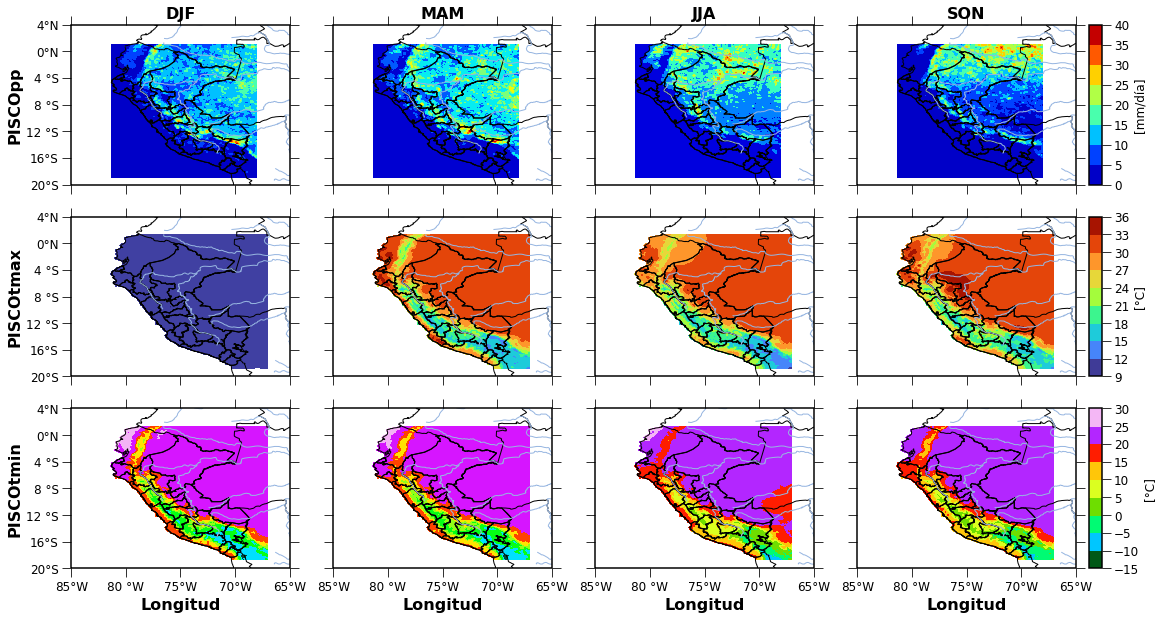

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib
# Trazar los plots..
matplotlib.rcParams['font.size'] =12
plt.rcParams["axes.linewidth"]  = 1.5
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'New Century Schoolbook'
plt.rcParams["xtick.major.size"]=9
plt.rcParams["ytick.major.size"]=9
plt.rcParams['ytick.right'] =True
plt.rcParams['xtick.top'] =True

# Definir etiquetas de los ejes 'x' y 'y'
x_tick_labels = [u'85\N{DEGREE SIGN}W',u'80 \N{DEGREE SIGN}W',
                 u'75\N{DEGREE SIGN}W',u'70\N{DEGREE SIGN}W',
                 u'65\N{DEGREE SIGN}W']

y_tick_labels = [u'20\N{DEGREE SIGN}S', u'16\N{DEGREE SIGN}S', u'12 \N{DEGREE SIGN}S',u'8 \N{DEGREE SIGN}S',u'4 \N{DEGREE SIGN}S',
                 u'0\N{DEGREE SIGN}N',u'4\N{DEGREE SIGN}N']

import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Poyección
projection = ccrs.PlateCarree()

## Establecer el tamaño y dimension de los plots...
fig, axes = plt.subplots(3,4,sharex=True, sharey=True,subplot_kw=dict(projection=ccrs.PlateCarree())) # 3 filas * 4 columnas
fig.set_size_inches(18,10)

# Trazar datos de temporadas
for i, season in enumerate(('DJF','MAM','JJA', 'SON')):
    
    o= axes[0,i].contourf(long_day, lat_day,seas_pp['variable'].sel(season=season),
                          transform=projection,cmap='jet')# hatches=['//']
    p= axes[1,i].contourf(long_tmax,lat_tmax,seas_tmax['tmax'].sel(season=season),
                          transform=projection,cmap='turbo')
    q= axes[2,i].contourf(long_tmin,lat_tmin,seas_tmin['tmin'].sel(season=season),
                          transform=projection,cmap='gist_ncar')
    
    
    axes[0, i].set_title(season,fontsize=16,fontweight='bold')

# agregue líneas costeras y fronteras de países a la gráfica de contorno
for ax in axes.flat:
    ax.set_xlim(-85,-65)
    ax.set_ylim(-20,4)
    ax.set_xticks(np.linspace(-85,-65,5), crs=projection)
    ax.set_yticks(np.linspace(-20,4,4), crs=projection)
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linewidths=1)
    ax.axes.axis('tight')
    ax.add_feature(ShapelyFeature(hp_shp.geometries(),ccrs.PlateCarree(), edgecolor='black'), facecolor='none') # agregar .shp
    ax.add_feature(cfeature.RIVERS)
    
# Oculte las etiquetas 'x' y marque las etiquetas de los plots...
for ax in axes.flat:
    ax.label_outer()
    ax.set_xticks([-85,-80,-75,-70,-65])
    ax.set_xticklabels(x_tick_labels)
    ax.set_yticks([-20,-16,-12,-8,-4,0,4])
    ax.set_yticklabels(y_tick_labels)
    
# Asignar etiqueta al eje y
for i,rowlabel in enumerate(('PISCOpp' ,'PISCOtmax', 'PISCOtmin')):
    axes[i, 0].set_ylabel(rowlabel,fontsize=16,fontweight='bold')

for ax in axes[-1,:].flatten():
    ax.set_xlabel('Longitud',fontsize=16,fontweight='bold')

# Aplanar ejes y obtener posiciones de los plots...
DP = axes.T.flatten()

# Ajuste la barra de colores al lado derecho de cada fila
# donde arg es [izquierda, abajo, ancho, alto]
cax1=fig.add_axes([DP[9].get_position().x1+0.01,DP[9].get_position().y0, 
                 0.01,DP[9].get_position().height])                      
cax2=fig.add_axes([DP[10].get_position().x1+0.01,DP[10].get_position().y0, 
                 0.01,DP[10].get_position().height])
cax3=fig.add_axes([DP[11].get_position().x1+0.01,DP[11].get_position().y0,
                 0.01,DP[11].get_position().height])

# Trazar colorbar..
fig.colorbar(o, cax=cax1,label="[mm/día]")
fig.colorbar(p, cax=cax2,label="[°C]")
fig.colorbar(q, cax=cax3,label="[°C]")

plt.show()

In [ ]:
....